<a href="https://colab.research.google.com/github/anthonytsclafani/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Learning Objectives

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function

- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations - eg. .strip(), .split(), .replace() and list comprehensions
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series - lots more details about time using and not using Pandas
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

#Pandas is not "Pythonic". 

What does Pythonic mean???

???

## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity, and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe hold each hold a specific type of data. Lets inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [ ]:
#Import pandas
import pandas as pd

# Pandas Display Options:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)

### Let's explore feature engineering with the Ames Housing data.  Import the dataset and name it "house".

###1) Import the Ames Housing Data:

In [ ]:
house = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Housing/Ames%20Iowa%20Housing%20Data.csv')

###2) Let's explore some features of the dataset:

In [ ]:
#Print out the first five observations

house.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
#Print out the last five observations

house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
#Get info on each variable

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#What if I just want the data type?

house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
#How much missing data is there in each variable?

house.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
#How many missing observations are there in the entire dataset?

house.isnull().sum().sum()

6965

In [ ]:
#How could we access descriptive statistics for the numeric variables?

house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#How could we access descriptive statistics for the categorical variables?

house.describe(exclude='number')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Let's look a little more closely at `BedroomAbvGr`

`BedroomAbvGr` which stands for "Bedrooms Above Ground." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/LambdaSchool/data-science-practice-datasets/blob/main/unit_1/Housing/ames_data_description.txt).

In [ ]:
# Look at a few rows of the `BedroomAbvGr` column.
# What is the data type?

house['BedroomAbvGr'].head()

0    3
1    3
2    3
3    3
4    4
Name: BedroomAbvGr, dtype: int64

What type of variable is BedroomAbvGr?  Is it categorical or quantitative?  etc.

?????

Now lets take a closer look at `LotFrontage`.

In [ ]:
# Look at a few rows of the `LotFrontage` column.

house['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [ ]:
# Possible values of lot frontage

house['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: Does every house have a lot frontage?

In [ ]:
house['LotFrontage'].nunique()

110

In [ ]:
house['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes sense to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember - Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [ ]:
#import numpy

import numpy as np

# What is the datatype of NaN?

type(np.nan)


float

The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

# [Objective 01](#feature-engineering) - Feature Engineering



### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice1`


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
# get a single column

subset = house[ [ 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice'] ].copy()


In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [ ]:
# Get more than one column, then pass in a list of column headers


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

#In the following example we are copying a set to another set using = operator. 
#The problem with this method is that if any of the set (old or new) is modified, 
#the changes will reflect in both the sets. If you do not want this kind of behavior 
#and only want the set where you are making changes to be changed then use copy() method

subset['TotalSquareFootage'] = 0


In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,0
1,1262,1262,0,181500,0
2,920,920,866,223500,0
3,756,961,756,140000,0
4,1145,1145,1053,250000,0


This is the best tutorial I've seen about the difference between assignment, a shallow copy and a deep copy: https://medium.com/better-programming/assignment-vs-shallow-copy-vs-deep-copy-in-python-246ea4d36b3c


In [ ]:
#Look at the data types


### Creating a new column by doing arithmetic on other columns

In [ ]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset
subset['TotalSquareFootage'] = subset['TotalBsmtSF'] + subset['1stFlrSF'] + subset['2ndFlrSF']



In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [ ]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage

subset['PricePerSqFt'] = subset['SalePrice'] / subset['TotalSquareFootage']

subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


###Why might you want to have the total square footage or price per square foot variables?

?????

###We can also use if-then statements to create new variables.  

Say we want to categorize houses as having a high price per square foot (greater than or equal to 80 dollars per square foot) or a low price per square foot (less than 80 dollars per square foot).

In [ ]:
#The format is DF.loc[DF['COLUMN'] logical expression, 'NEW VARIABLE NAME' ] assignment

subset.loc[ subset['PricePerSqFt'] >= 80, 'High_priced' ] = 1
subset.loc[ subset['PricePerSqFt'] < 80, 'High_priced' ] = 0

subset.head()


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced
0,856,856,854,208500,2566,81.254871,1.0
1,1262,1262,0,181500,2524,71.909667,0.0
2,920,920,866,223500,2706,82.594235,1.0
3,756,961,756,140000,2473,56.611403,0.0
4,1145,1145,1053,250000,3343,74.783129,0.0


Why might we want to have categories for high and low cost per square foot?



?????

### Let's include "and" and "or" conditions in the if-then statements.

We can identify high price per square foot houses with basements.

In [ ]:

subset.loc[ (subset['PricePerSqFt'] >= 80) & (subset['TotalBsmtSF'] > 0)  , 'High_price_with_basement' ] = 1



In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced,High_price_with_basement
0,856,856,854,208500,2566,81.254871,1.0,1.0
1,1262,1262,0,181500,2524,71.909667,0.0,NaN
2,920,920,866,223500,2706,82.594235,1.0,1.0
3,756,961,756,140000,2473,56.611403,0.0,NaN
4,1145,1145,1053,250000,3343,74.783129,0.0,NaN


In [ ]:
subset['High_price_with_basement'] = subset['High_price_with_basement'].fillna(0)

In [ ]:
subset.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt,High_priced,High_price_with_basement
0,856,856,854,208500,2566,81.254871,1.0,1.0
1,1262,1262,0,181500,2524,71.909667,0.0,0.0
2,920,920,866,223500,2706,82.594235,1.0,1.0
3,756,961,756,140000,2473,56.611403,0.0,0.0
4,1145,1145,1053,250000,3343,74.783129,0.0,0.0


In [ ]:
#No missing data so we can assume if basement sqft = 0 then there is no basement.





## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective 02](#work-with-strings) - Work with Strings with Pandas

# [Objective 03](#pandas-apply) - Modify and Create Columns using `.apply()`



## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.



In [ ]:
# Read in the CSV
import pandas as pd

loans_data = 'https://lambdaschool-ds-instruction.s3.amazonaws.com/datasets%3Aloanstats_2018Q4.tar.gz'
loans = pd.read_csv(loans_data)

print(loans.shape)
loans.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128416, 1)


._LoanStats_2018Q4.csv
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title           emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage        settlement_term
NaN NaN       3300      3300        3300             36 months  23.40%  128.44      E     E1        Program Manager     3 years    RENT           49700      Source Verified     Dec-2018 Current     n          NaN NaN  vacation           Vacation           310xx    GA         14.32 0           Nov-2006         1              43                     NaN                    6        0       2358      26.5%      46        w                   1361.55   1361.55       3076.12     3076.12         1938.45         1137.67       0.0                0.0        0.0                     Dec-2020     128.44          Jan-2021     Dec-2020           0                          43                          1           Individual       NaN              NaN       NaN                       0              0            166884      2           2           0           2           18                 164526       75      2           2           2091       51       8900             0      0           1            4                    27814       491            82.5    0                        0           145                79                   1                     1              0        59                   43                       1                     43                             3                     2              3               2           3         39        4             7             3                   6        0                0            0                  2                  90.9           50               0                    0         170985          166884            2800           162085                     NaN             NaN  

In [ ]:
# We can also fix the header problem by using the 'skiprows' parameter

loans = pd.read_csv(loans_data, skiprows=1)

loans.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,3300.0,3300.0,3300.0,36 months,23.40%,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,310xx,GA,14.32,0.0,Nov-2006,1.0,43.0,NaN,6.0,0.0,2358.0,26.5%,46.0,w,1361.55,1361.55,3076.12,3076.12,1938.45,1137.67,0.0,0.0,0.0,Dec-2020,128.44,Jan-2021,Dec-2020,0.0,...,39.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,2.0,90.9,50.0,0.0,0.0,170985.0,166884.0,2800.0,162085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8500.0,8500.0,8500.0,36 months,16.14%,299.43,C,C4,Asst. Manager,8 years,MORTGAGE,80000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,756xx,TX,16.59,0.0,Mar-2006,1.0,48.0,NaN,11.0,0.0,683.0,8.2%,15.0,w,3296.63,3296.63,7174.89,7174.89,5203.37,1971.52,0.0,0.0,0.0,Dec-2020,299.43,Jan-2021,Dec-2020,0.0,...,5.0,6.0,7.0,3.0,11.0,0.0,0.0,0.0,4.0,93.3,0.0,0.0,0.0,59470.0,41877.0,6200.0,30998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2200.0,2200.0,2200.0,36 months,15.02%,76.29,C,C3,NaN,NaN,RENT,70000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,871xx,NM,14.16,1.0,Feb-2006,0.0,7.0,NaN,7.0,0.0,1012.0,77.8%,12.0,w,0.00,0.00,2668.46,2668.46,2200.00,468.46,0.0,0.0,0.0,Dec-2020,992.83,Dec-2020,Dec-2020,0.0,...,8.0,2.0,3.0,2.0,7.0,0.0,0.0,0.0,1.0,83.3,100.0,0.0,0.0,228937.0,17314.0,1300.0,29137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,327xx,FL,21.16,0.0,Aug-1998,1.0,32.0,NaN,8.0,0.0,8018.0,35.2%,38.0,w,1970.46,1970.46,4329.07,4329.07,3029.54,1299.53,0.0,0.0,0.0,Dec-2020,180.69,Jan-2021,Dec-2020,0.0,...,20.0,6.0,15.0,5.0,8.0,0.0,0.0,0.0,6.0,78.9,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,17100.0,17100.0,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,3

In [ ]:

loans_ = pd.read_csv(loans_data, skiprows=1)

print(loans_.shape)
loans_.head()

loans = loans_[0:128412]

loans.tail()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128415, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000.0,23000.0,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1.0,Aug-1985,2.0,22.0,NaN,12.0,0.0,22465.0,43.6%,28.0,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,Dec-2018,797.53,NaN,Nov-2018,0.0,...,3.0,9.0,19.0,5.0,12.0,0.0,0.0,0.0,7.0,96.4,14.3,0.0,0.0,296500.0,40614.0,47100.0,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000.0,10000.0,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3.0,Jul-1982,0.0,6.0,NaN,11.0,0.0,5634.0,37.1%,16.0,w,3240.02,3240.02,9007.42,9007.42,6759.98,2247.44,0.0,0.0,0.0,Dec-2020,346.76,Jan-2021,Dec-2020,0.0,...,1.0,8.0,11.0,5.0,11.0,0.0,0.0,0.0,1.0,73.3,40.0,0.0,0.0,91403.0,9323.0,9100.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000.0,5000.0,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1.0,Jun-2006,0.0,21.0,NaN,9.0,0.0,2597.0,27.3%,15.0,f,1597.01,1597.01,4411.81,4411.81,3402.99,1008.82,0.0,0.0,0.0,Dec-2020,169.83,Jan-2021,Dec-2020,0.0,...,6.0,6.0,7.0,3.0,9.0,0.0,0.0,0.0,3.0,92.9,50.0,0.0,0.0,93908.0,4976.0,3000.0,6028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000.0,10000.0,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0.0,Oct-2008,2.0,40.0,NaN,15.0,0.0,6269.0,13.1%,25.0,f,3116.30,3038.39,8504.32,8291.71,6883.70,1620.62,0.0,0.0,0.0,Dec-2020,327.68,Jan-2021,Dec-2020,0.0,...,3.0,14.0,22.0,4.0,15.0,0.0,0.0,0.0,3.0,92.0,0.0,0.0,0.0,57871.0,16440.0,20500.0,10171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000.0,10000.0,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,C

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(107), object(37)
memory usage: 141.1+ MB


In [ ]:
loans.shape

(128412, 144)

._LoanStats_2018Q4.csv
NaN NaN 23000 23000 23000  36 months  15.02% 797.53 C C3 Tax Consultant       10+ years MORTGAGE 75000.0 Source Verified Oct-2018 Charged Off n NaN NaN debt_consolidation Debt consolidation      352xx AL 20.95 1 Aug-1985 2 22.0 NaN 12 0 22465.0 43.6% 28 w 0.00    0.00    1547.08 1547.08 1025.67 521.41  0.0 0.0 0.0 Dec-2018 797.53 NaN      Nov-2018 0 NaN  1 Individual NaN NaN NaN 0 0    259658.0 4 2  3 3 6.0  18149   86.0  4 6 12843 56.0 51500 2 2 5 11 21638  26321.0 44.1 0 0 12.0  397 4  4  6 5.0   22.0 4.0  22.0 0 4 5 7 14 3  9  19 5 12 0.0 0 0 7 96.4 14.3 0 0 296500.0 40614 47100 21000   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN                    NaN
        10000 10000 10000  36 months  15.02% 346.76 C C3 security guard       5 years   MORTGAGE 38000.0 Not Verified    Oct-2018 Current     n NaN NaN debt_consolidation Debt consolidation      443xx OH 13.16 3 Jul-1982 0 6.0  NaN 11 0 5634    37.1% 16 w 3240.02 3240.02 9007.42 9007.42 6759.98 2247.44 0.0 0.0 0.0 Dec-2020 346.76 Jan-2021 Dec-2020 0 NaN  1 Individual NaN NaN NaN 0 155  77424.0  0 1  0 0 34.0 200     10.0  1 1 1866  42.0 15200 2 0 0 2  7039.0 4537.0  50.1 0 0 34.0  434 11 11 3 11.0  6.0  17.0 6.0  0 3 5 5 6  1  8  11 5 11 0.0 0 0 1 73.3 40.0 0 0 91403.0  9323  9100  2000    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN                    NaN
        5000  5000  5000   36 months  13.56% 169.83 C C1 Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current     n NaN NaN debt_consolidation Debt consolidation      381xx TN 11.30 1 Jun-2006 0 21.0 NaN 9  0 2597    27.3% 15 f 1597.01 1597.01 4411.81 4411.81 3402.99 1008.82 0.0 0.0 0.0 Dec-2020 169.83 Jan-2021 Dec-2020 0 NaN  1 Individual NaN NaN NaN 0 1413 69785    0 2  0 1 16.0 2379    40.0  3 4 1826  32.0 9500  0 0 1 5  8723   1174.0  60.9 0 0 147.0 85  9  9  2 10.0  21.0 9.0  21.0 0 1 3 2 2  6  6  7  3 9  0.0 0 0 3 92.9 50.0 0 0 93908    4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN                    NaN
        10000 10000 9750   36 months  11.06% 327.68 B B3 NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current     n NaN NaN credit_card        Credit card refinancing 980xx WA 11.78 0 Oct-2008 2 40.0 NaN 15 0 6269    13.1% 25 f 3116.30 3038.39 8504.32 8291.71 6883.70 1620.62 0.0 0.0 0.0 Dec-2020 327.68 Jan-2021 Dec-2020 0 53.0 1 Individual NaN NaN NaN 0 520  16440    3 1  1 1 2.0  10171   100.0 2 5 404   28.0 47700 0 3 5 6  1265.0 20037.0 2.3  0 0 61.0  119 1  1  0 1.0   NaN  1.0  40.0 1 2 4 6 8  3  14 22 4 15 0.0 0 0 3 92.0 0.0  0 0 57871.0  16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN                    NaN
                    10000  36 months  16.91% 356.08 C C5 Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current     n NaN NaN other              Other                   021xx MA 17.72 1 Sep-2006 0 14.0 NaN 17 0 1942    30.8% 31 w 3299.68 3299.68 9248.69 9248.69 6700.32 2548.37 0.0 0.0 0.0 Dec-2020 356.08 Jan-2021 Dec-2020 0 25.0 1 Individual NaN NaN NaN 0 0    59194    0 15 1 1 12.0 57252.0 85.0  0 0 1942  80.0 6300  0 5 0 1  3482   2058.0  48.5 0 0 144.0 142 40 12 0 131.0 30.0 NaN  30.0 3 1 1 1 5  22 2  9  1 17 0.0 0 0 1 74.2 0.0  0 0 73669    59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N NaN NaN NaN NaN NaN                    NaN

In [ ]:
# Skip the footer as well.


A quick note about missing data...  Why might there be so much missing data for membrID, etc.

In [ ]:
#check for missing data in loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 128413 entries, ('id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', '

In [ ]:
#drop columns where everything is missing


In [ ]:
#did it work?


### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column:

In [ ]:
# Look at the first 10 values of the int_rate column

loans['int_rate'].head(10)

0     23.40%
1     16.14%
2     15.02%
3     17.97%
4     18.94%
5     16.14%
6     18.94%
7     16.91%
8     12.98%
9     11.80%
Name: int_rate, dtype: object

In [ ]:
# We can use .str.strip to remove both the leading space and the % sign and cast the value to a float rather than a string.
loans = loans.copy()


In [ ]:
loans['int_rate'] = loans['int_rate'].str.strip('%')



In [ ]:
loans['int_rate'].head(10)

0     23.40
1     16.14
2     15.02
3     17.97
4     18.94
5     16.14
6     18.94
7     16.91
8     12.98
9     11.80
Name: int_rate, dtype: object

In [ ]:
#Remove the white space

loans['int_rate'] = loans['int_rate'].str.strip()

loans['int_rate'].head()


0    23.40
1    16.14
2    15.02
3    17.97
4    18.94
Name: int_rate, dtype: object

In [ ]:
#Remove both by using both functions



In [ ]:
#Finally, we need to cast our value to a float so we can do calculations on it

loans['int_rate'] = loans['int_rate'].astype(float)

In [ ]:
loans['int_rate'].head()

0    23.40
1    16.14
2    15.02
3    17.97
4    18.94
Name: int_rate, dtype: float64

#Let's talk about another way to approach this problem by building a function and using .apply()

In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
example_int_rate = ' 14.47%'


In [ ]:
#Doesn't work to try to apply the .strip function to an entire column all at once (without the .str).
#The function has to be applied to a text string.

float(example_int_rate.strip().strip('%'))


14.47

In [ ]:
#You can "chain" two strip functions to remove both the spaces and the % sign



In [ ]:
# "Cast" the string value to a float
# "cast" -> Change something's data type
# This is the line of code that we're after! ->


In [ ]:
#check the variable type

### Write a function to make our solution reusable!

In [ ]:
#Review what we're working with one more time

def clean_data(strg):

  return float(strg.strip().strip('%'))

clean_data(example_int_rate)

14.47

In [ ]:
loans['int_rate']
loans = loans.copy()

In [ ]:
loans['int_rate_cleaned_function'] = loans['int_rate'].apply(clean_data)


In [ ]:
loans['int_rate_cleaned_function']

0         23.40
1         16.14
2         15.02
3         17.97
4         18.94
          ...  
128407    15.02
128408    15.02
128409    13.56
128410    11.06
128411    16.91
Name: int_rate_cleaned_function, Length: 128412, dtype: float64

We want to write a function that will look in every cell of int_rate, take out the white space and the % and convert the result into a float.

Every function has several standard parts:

* def statement
* name
* parameter name(s)
* body
* a return statement
* a return value

Here's an example of a function that the raduius of a sphere and calculates the volume.

It would be a pain to have to write this code over and over again if we needed to do this calculation a lot, so it's nice to have it written as a re-usable function. 

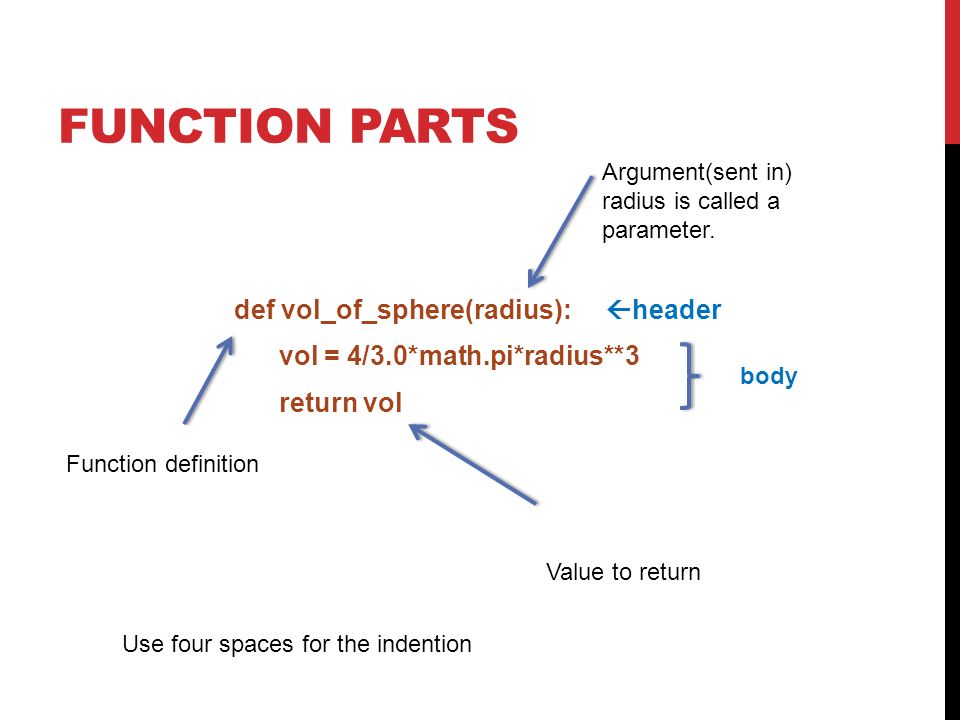

In [ ]:
# Here is a function that will take a single string, strip off the space and %
# And return the value as a float

def int_rate_to_float(string):
  return float(string.strip().strip('%'))

* def = _____________
* return = ____________
* int_rate_to_float = ________________
* string = _______________
* float(string.strip().strip('%')) = __________________



In [ ]:
# Test out our function by calling it on int_rate, the string we created earlier.



In [ ]:
# is the data type correct?


The the problem is that - to use this function - we'd have to feed in every interest rate one by one.  Not pracitcal.  

Fortunately we can use the .apply() function built to into Python, which will apply the function to every row of a variable.

### Apply to every row using .apply

In [ ]:
#Apply to every row

In [ ]:
# pass in *only* the name of the function, don't call it. 
# This works because we know the function works on every item in the column
# so I can simply "apply" it to the entire column

